# Procedimientos para usar este Notebook

- Instalar [Anaconda](https://www.anaconda.com/)
- Abrir el prompt de Anaconda, dirigirse al directorio de trabajo y activar el entorno virtual:

    `conda env create -f entorno_SIMCA.yml`
        
    `conda activate entorno_SIMCA`


- Una vez activado el entorno, ejecutar el siguiente comando en el prompt:

    `jupyter notebook`

Ejecutar la siguiente celda para crear directorio para datos custom:

In [97]:
#crear directorio Custom  
import os
if not os.path.exists("Custom"):
    os.makedirs("Custom")

# Datos

In [120]:
def obtain_data(inputs,param=None):  
       
    url = "https://apiprocessdev.ihcantabria.com/chambo-api/Hydrographies/{0}".format(inputs["section"])
        
    headers = {'Accept':  'application/json'}
    s = requests.Session()
    r1 = s.get(url, headers=headers) 
        
    data1=json.loads(r1.text)
    if param:
        s = requests.Session()
        r1 = s.get(url, headers=headers,  json =param) 
        data1=json.loads(r1.text)
    return data1

In [121]:
dem=pd.DataFrame(obtain_data({'section': 'parametros-usos/demandas'}))
dem_tipos=pd.DataFrame(obtain_data({'section': 'parametros-usos/demandas/tipos'}))
dem_param=pd.DataFrame(obtain_data({'section': 'parametros-usos/demandas/param'}))
dams=pd.DataFrame(obtain_data({'section': 'dams'})) #cambiar name pro nombre en a API de BD
tramos=pd.DataFrame(obtain_data({'section': 'sub-catchments'}))

In [125]:
dem_tipos[['id','ss','cf','np','dbo']]

,id,ss,cf,np,dbo
0,HUM_1,200,1000000.0,500,400
1,IND_1,300,1000000.0,1000,500
2,ACU_1,0,1000000.0,2000,500
3,ENE_1,0,0.0,0,0
4,RIE_1,100,0.0,0,0


In [146]:
tramos.columns

Index(['Area_AGR', 'Area_URB', 'Area_km2', 'LongCauce_km', 'Sub_Catchment_id',
       'anch', 'fce', 'fin', 'nombre', 'pend', 's0', 'tau'],
      dtype='object')

In [155]:
tramos[['Sub_Catchment_id','Area_km2','LongCauce_km','pend','anch','s0','tau','fce','Area_AGR','Area_URB']]

,Sub_Catchment_id,Area_km2,LongCauce_km,pend,anch,s0,tau,fce,Area_AGR,Area_URB
0,1,7.9604,4.7172,29.1701,2.8214,11.19,0.9662,0.99,2.1889,0.0173
1,2,25.2904,5.1021,1.7444,59.3054,8.90,1.2009,0.99,6.9427,0.0000
2,3,8.9115,5.2013,15.6307,2.9852,9.73,1.5012,0.75,0.0334,0.0000
3,4,0.3186,0.6311,5.8623,12.6832,10.51,0.8125,0.75,0.0163,0.0000
4,5,0.8759,1.2745,3.4523,9.0742,11.36,2.6755,0.75,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...
71,72,0.7945,1.2133,1.8132,17.7796,12.79,0.3587,0.99,0.6390,0.0000
72,73,16.0832,1.9513,5.8936,59.7935,11.66,0.3285,0.99,8.7186,0.0293
73,74,118.9820,17.5056,3.8080,14.6313,11.80,2.1049,0.87,42.3433,0.8057
74,75,96.1269,16.3733,5.1853,9.8044,14.33,1.7752,0.70,2.6085,0.0000


In [156]:
prec=pd.read_csv('D:/Chambo/CHAMBO.APIprocess/Tablas/Series_Chambo_prec.csv')
tmax=pd.read_csv('D:/Chambo/CHAMBO.APIprocess/Tablas/Series_Chambo_tmax.csv')
tmin=pd.read_csv('D:/Chambo/CHAMBO.APIprocess/Tablas/Series_Chambo_tmin.csv')

In [157]:
prec

,fechas,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,01/01/2000,0.000000,0.275964,0.407376,0.000000,0.000000,0.153960,0.275964,0.080524,0.080524,...,0.153379,0.298390,2.409696,0.200264,0.076689,0.000000,0.275964,0.000000,5.242812,0.209195
1,02/01/2000,0.000000,0.464827,0.686173,0.000000,0.000000,0.432133,0.464827,0.484093,0.484093,...,0.922081,0.647828,6.171478,0.929224,0.461041,1.338188,0.464827,0.000000,13.427377,0.970663
2,03/01/2000,0.000000,0.949894,1.402224,0.000000,0.000000,0.446203,0.949894,0.528700,0.528700,...,1.007047,0.331947,19.435387,0.402497,0.503524,1.210586,0.949894,0.000000,42.285861,0.420447
3,04/01/2000,8.626333,1.359295,2.006579,12.323333,12.323333,2.541020,1.359295,4.988924,4.988924,...,1.287157,4.680772,0.114112,7.092489,0.643579,0.810837,1.359295,0.000000,0.248275,7.408787
4,05/01/2000,3.519102,1.605392,2.369864,5.027288,5.027288,0.848293,1.605392,2.258576,2.258576,...,0.950524,0.635059,1.407157,1.002827,0.475262,0.707473,1.605392,0.000000,3.061573,1.047550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7300,27/12/2019,0.571095,2.723266,4.020060,0.815850,0.815850,4.785741,2.723266,0.285548,0.285548,...,0.000000,7.760664,0.570345,12.814878,0.140483,0.140483,2.723266,1.559999,0.000000,13.386373
7301,28/12/2019,1.158080,0.629448,0.929186,1.654401,1.654401,6.000301,0.629448,2.743867,2.743867,...,4.123480,8.669631,0.007078,13.919685,4.426817,3.471232,0.629448,0.019359,0.000000,14.540451
7302,29/12/2019,0.638625,0.539311,0.796126,0.912322,0.912322,0.915434,0.539311,8.573168,8.573168,...,15.721629,0.128293,0.001880,0.000000,8.863772,3.809579,0.539311,0.005141,0.000000,0.000000
7303,30/12/2019,0.417379,0.058282,0.086035,0.596256,0.596256,0.590533,0.058282,9.397635,9.397635,...,17.502754,0.677560,0.090562,1.118828,9.086775,3.153708,0.058282,0.209320,0.030533,1.168724


# Códigos 

Códigos que ejecutan los diferentes móludos de SIMCA por medio de la API https://apiprocess.ihcantabria.com/chambo-apiprocess y devuelven las tablas con resultados.

In [21]:
import json
import pandas as pd     
import requests    
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def MELCA(sub_catchment_id,initial_date,final_date,series,global_tau):

    url = "https://apiprocessdev.ihcantabria.com/chambo-apiprocess/CHAMBO Models/MELCA"


    param = {
            "sub-catchment id": sub_catchment_id,
            "initial date": initial_date,
            "final date": final_date,
            "series":series,
            "global_tau":global_tau
            }    

    print('Runing MELCA ...')

    post_np=requests.post(url,  json =param)     
    result=pd.DataFrame(json.loads(post_np.text))

    print('Writing tables ...')
    
    if series:
        result.to_csv("Quality_series.csv")
    else:
        result.to_csv("MELCA_Output.csv")  
    
    return result

def Custom_MELCA(sub_catchment_id,initial_date,final_date,series,global_tau):

    file1 = open("Custom/tramos_custom.csv", "rb")
    file2 = open("Custom/usos_custom.csv", "rb")
    file3 = open("Custom/tipos_custom.csv", "rb")
    file4 = open("Custom/param_custom.csv", "rb")
   

    print('Runing MELCA ...')

    if series:
        series_d ='true'
    else:
        series_d='false'

    post_np = requests.post(
        "https://apiprocessdev.ihcantabria.com/chambo-apiprocess/CHAMBO Models/Custom/MELCA",
        files={
            "tracks": file1,
            "usos":  file2,
            "tipos": file3,
            "param": file4
        },
        data={
            "catchment_id": sub_catchment_id,
            "initial_date": initial_date,
            "final_date": final_date,
            "series": series_d,
            "global_tau": global_tau
        },
    )
    
    results= json.loads(post_np.text)    
    table=pd.DataFrame(results)

    print('Writing tables ...')

    table.to_csv("MELCA_Output_custom.csv")  
    
    return table


In [54]:
def MANAGEMENT(sub_catchment_id,initial_date,final_date,series):

    url = "https://apiprocessdev.ihcantabria.com/chambo-apiprocess/CHAMBO Models/MANAGEMENT"


    param = {
            "sub-catchment id": sub_catchment_id,
            "initial date": initial_date,
            "final date": final_date,
            "series":series
            }    

    print('Runing MANAGEMENT ...')

    post_np=requests.post(url,  json =param) 
    results= json.loads(post_np.text)

    print('Writing tables ...')
    

    if series:
        table=pd.DataFrame(results)
        table.to_csv("MANAGEMENT_series.csv")
        return table
    else:
        table1=pd.DataFrame({
                            'id':results['id'],
                            'lon':results['lon'],
                            'IAC1':results['iamb1'],
                            'IAC2':results['iamb2']
                            })

        table2=pd.DataFrame({
                            'Gar':results['gar'],
                            'VaL_unit_med':results['vumed'],
                            'Val_agr':results['valag'],
                            })

        table1.to_csv("MANAGEMENT_tramos.csv")  
        table2.to_csv("MANAGEMENT_demandas.csv")  
        return [table1,table2,results['qout_med']]
    
def Custom_MANAGEMENT(sub_catchment_id,initial_date,final_date,series):

    if series:
        series_d ='true'
    else:
        series_d='false'

    file1 = open("Custom/tramos_custom.csv", "rb")
    file2 = open("Custom/usos_custom.csv", "rb")
    file3 = open("Custom/tipos_custom.csv", "rb")
    file4 = open("Custom/param_custom.csv", "rb")

    print('Runing MANAGEMENT...')
    post_np = requests.post(
        "https://apiprocessdev.ihcantabria.com/chambo-apiprocess/CHAMBO Models/Custom/MANAGEMENT",
        files={
            "tracks": file1,
            "usos":  file2,
            "tipos": file3,
            "param": file4
        },
        data={
            "catchment_id": sub_catchment_id,
            "initial_date": initial_date,
            "final_date": final_date,
            "series": series_d,
        },
    )

    results= json.loads(post_np.text)
    print('Writing tables ...')

    if series:
        table=pd.DataFrame(results)
        table.to_csv("MANAGEMENT_series_custom.csv")
        return table
    else:
        table1=pd.DataFrame({
                            'id':results['id'],
                            'lon':results['lon'],
                            'IAC1':results['iamb1'],
                            'IAC2':results['iamb2']
                            })

        table2=pd.DataFrame({
                            'Gar':results['gar'],
                            'VaL_unit_med':results['valag'],
                            'Val_agr':results['vumed']
                            })

        table1.to_csv("MANAGEMENT_tramos_custom.csv")  
        table2.to_csv("MANAGEMENT_demandas_custom.csv")  
        return [table1,table2,results['qout_med']]

In [55]:
def Quality(sub_catchment_id,initial_date,final_date,series):

    url = "https://apiprocessdev.ihcantabria.com/chambo-apiprocess/CHAMBO Models/Quality"


    param = {
            "sub-catchment id": sub_catchment_id,
            "initial date": initial_date,
            "final date": final_date,
            "series":series
            }    

    print('Runing Quality ...')

    post_np=requests.post(url,  json =param) 
    results= json.loads(post_np.text)

    print('Writing tables ...')

    if series:
        table=pd.DataFrame(results)
        table.to_csv("Quality_series.csv")
    else:
        table=pd.DataFrame(results)
        table.to_csv("Quality_results.csv")
    return table
#-------------------------------------------------------------------------
def Custom_Quality(sub_catchment_id,initial_date,final_date,series):

    if series:
        series_d ='true'
    else:
        series_d='false'

    file1 = open("Custom/tramos_custom.csv", "rb")
    file2 = open("Custom/usos_custom.csv", "rb")
    file3 = open("Custom/tipos_custom.csv", "rb")
    file4 = open("Custom/param_custom.csv", "rb")

    print('Runing Quality...')
    post_np = requests.post(
        "https://apiprocessdev.ihcantabria.com/chambo-apiprocess/CHAMBO Models/Custom/Quality",
        files={
            "tracks": file1,
            "usos":  file2,
            "tipos": file3,
            "param": file4
        },
        data={
            "catchment_id": sub_catchment_id,
            "initial_date": initial_date,
            "final_date": final_date,
            "series": series_d,
        },
    )

    print('Writing tables ...')


    results= json.loads(post_np.text)

    if series:
        table=pd.DataFrame(results)
        table.to_csv("Quality_series_custom.csv")
    else:
        table=pd.DataFrame(results)
        table.to_csv("Quality_results_custom.csv")    
    return table

In [25]:
#Parámetros
sub_catchment_id=73 
initial_date="00-01-01"
final_date="19-31-12"
global_tau=20
custom=False #True para cargar tablas Custom

# Versión SIMCA para python

La versión de SIMCA que se encuentra ejecutando en Python posee las siguientes características:

- Utiliza los valores medios depara calcular el caudal.
- No posee el módulo de nieve.
- No posee enbalces.
- Tiene una implementación de routing considerando depósitos lineales y la ecuación de Mannin's para calcular los $\tau$ por tramos.
- Considera un modelo semi-distribuído.

# Parámetros Custom

Los siguientes parámetros pueden ser modificados por el usuario cuando se ejecutan los métodos en modo Custom.

In [7]:
print('Tramos Custom: ',list(pd.read_csv('Custom/tramos_custom.csv').columns))
print('Usos Custom: ',list(pd.read_csv('Custom/usos_custom.csv').columns))
print('Tipos Custom: ',list(pd.read_csv('Custom/tipos_custom.csv').columns))
print('Param Custom: ',list(pd.read_csv('Custom/param_custom.csv').columns))

Tramos Custom:  ['s0', 'fce', 'Area_AGR', 'Area_URB']
Usos Custom:  ['id', 'inic', 'fin', 'tipo', 'tret', 'pri', 'QT1', 'QT2', 'QT3', 'QT4', 'VA_min', 'VA_max']
Tipos Custom:  ['id', 'ss', 'cf', 'np', 'dbo']
Param Custom:  ['id', 'nombre', 'val']


Quitar fce, agregar $\lambda$

Param

S0 no


# Módulo MELCA

In [26]:
if custom:
    MELCA_RESULTS=Custom_MELCA(sub_catchment_id,initial_date,final_date,False,global_tau)
else:
    MELCA_RESULTS=MELCA(sub_catchment_id,initial_date,final_date,False,global_tau)
print('Finished')

Runing MELCA ...
Writing tables ...
Finished


### Resultados por tramos:

In [27]:
MELCA_RESULTS

,area,area_ac,ce_ac,id,petmed,petmed_ac,precmed,precmed_ac,q20_ac,q50_ac,q80_ac,qmed,qmed_ac,qmed_ac_inst,qrmed_ac,smax,tau_tramos
0,7.9604,7.9604,0.587132,1,1054.846520,1054.846520,1523.943728,1523.943728,0.026877,0.072122,0.264313,0.225702,0.225702,0.225690,0.225702,121.287656,0.836597
1,25.2904,3517.1312,0.530115,2,1054.846520,888.519151,1530.183389,1061.790693,27.872135,50.671925,87.160089,0.731778,62.732701,62.730600,62.772276,104.454192,0.508619
2,8.9115,8.9115,0.769682,3,799.126152,799.126152,2258.842146,2258.842146,0.062743,0.180373,0.627387,0.490957,0.490957,0.490930,0.490957,84.098008,1.254839
3,0.3186,160.8641,0.715325,4,799.126152,799.126152,2177.062469,1930.883987,1.914612,3.991558,10.116862,0.016678,7.040677,7.040309,7.041168,88.392883,0.095811
4,0.8759,82.3415,0.693873,5,799.126152,799.126152,2177.062469,1840.095901,1.025620,2.065217,4.710953,0.045830,3.331466,3.331305,3.331563,92.724345,0.315559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.7945,316.1146,0.284100,72,1054.846520,1039.823800,873.690120,677.493194,0.490297,1.087281,2.535888,0.007363,1.928040,1.928040,1.928278,131.112589,0.264843
72,16.0832,3575.2569,0.531543,73,1054.846520,891.223263,1530.183389,1069.373331,28.355014,51.837444,89.713169,0.459704,64.397848,64.395655,64.439910,124.312404,0.105082
73,118.9820,214.0764,0.262184,74,967.403228,957.524423,453.201383,463.440858,0.011182,0.129485,1.127977,0.435186,0.824261,0.824235,0.824341,114.823271,3.000889
74,96.1269,96.1269,0.741050,75,704.910277,704.910277,1898.834194,1898.834194,1.048474,2.313525,5.674923,4.286233,4.286233,4.286037,4.286233,93.190114,3.139097


### Series temporales:

In [28]:
global_tau=30
if custom:
    MELCA_Series=Custom_MELCA(sub_catchment_id,initial_date,final_date,True,global_tau)
else:
    MELCA_Series=MELCA(sub_catchment_id,initial_date,final_date,True,global_tau)
print('Finished')

Runing MELCA ...
Writing tables ...
Finished


In [29]:
MELCA_Series

,qinst,qinst_ac,qr,qsim,qsim_ac
0,0.391406,57.361889,57.361889,0.391406,57.361889
1,0.326873,56.508771,57.288783,0.365648,57.037029
2,0.266294,68.908652,56.959611,0.293673,60.751095
3,0.233284,74.551104,56.452915,0.248132,74.144093
4,0.214631,66.548671,55.942574,0.223149,70.718936
...,...,...,...,...,...
7300,0.029018,15.254227,15.428814,0.027693,14.695924
7301,0.029109,18.554379,15.115908,0.029404,16.670796
7302,0.027679,21.171685,14.849782,0.028416,20.175118
7303,0.025549,23.283668,14.646630,0.026676,22.099860


## Implementación del Routing

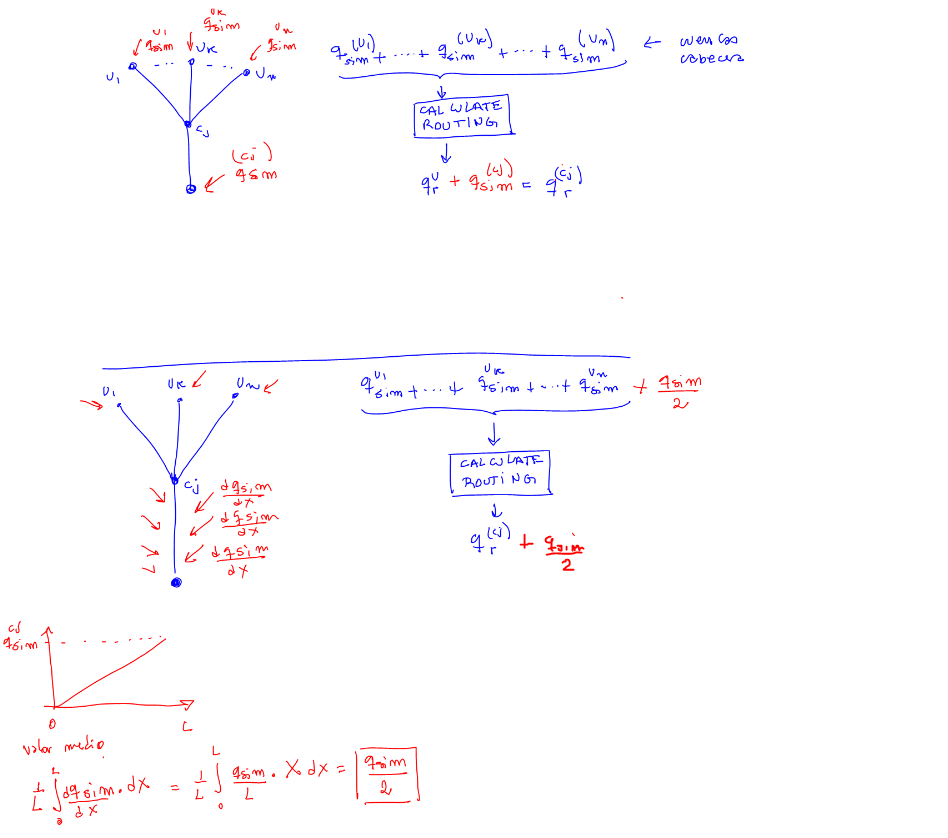

- Ordenar cuencas por jerarquía (las cabeceras tienen la menor jerarquía h=1).
- Crear un diccionario con el valor de la jerarquia en los keys: {'1':[cuenas index], '2':[cuencas index], ...}
- Definir una matriz que solo encuentra las upper-sub-catchments.

Text(0.5, 1.0, 'Matrix uppers')

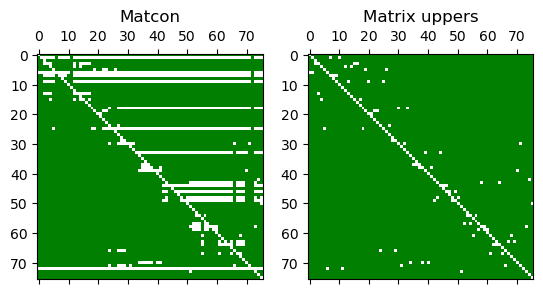

In [16]:
Matcom=pd.read_csv('D:/Chambo/CHAMBO.APIprocess/OUTPUTS/Matcon.csv')
uppers_matrix=pd.read_csv('D:/Chambo/CHAMBO.APIprocess/OUTPUTS/uppers_matrix.csv')

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.matshow(Matcom[Matcom.columns[1:]], cmap='ocean')
ax1.set_title('Matcon')
ax2.matshow(uppers_matrix[uppers_matrix.columns[1:]], cmap='ocean')
ax2.set_title('Matrix uppers')

In [17]:
print('Dimensiones matrices:',Matcom[Matcom.columns[1:]].shape)

Dimensiones matrices: (76, 76)


- Calcular el caudal natural (sin routing) para las cuencas cabeceras (las cuencas dentro del diccionario con h=1)
- Almacenarlos en la matrix routing de dimensiones (ndx76)
- Calcular el routing para las cuencas con h=2:
    - Selecciono las uppers para las cuencas en h2: uppers[h2, :] --> matriz de dimensiones h2x76
    - El caudal de entrada para el routing en el tramo j es: $\sum_i q^{ui}_r+ q^{cj}_{sim}$.
    - Calculo ese valor para cada una de las cuencas en h2, y pongo los resultados en una matriz de ndxh2.
    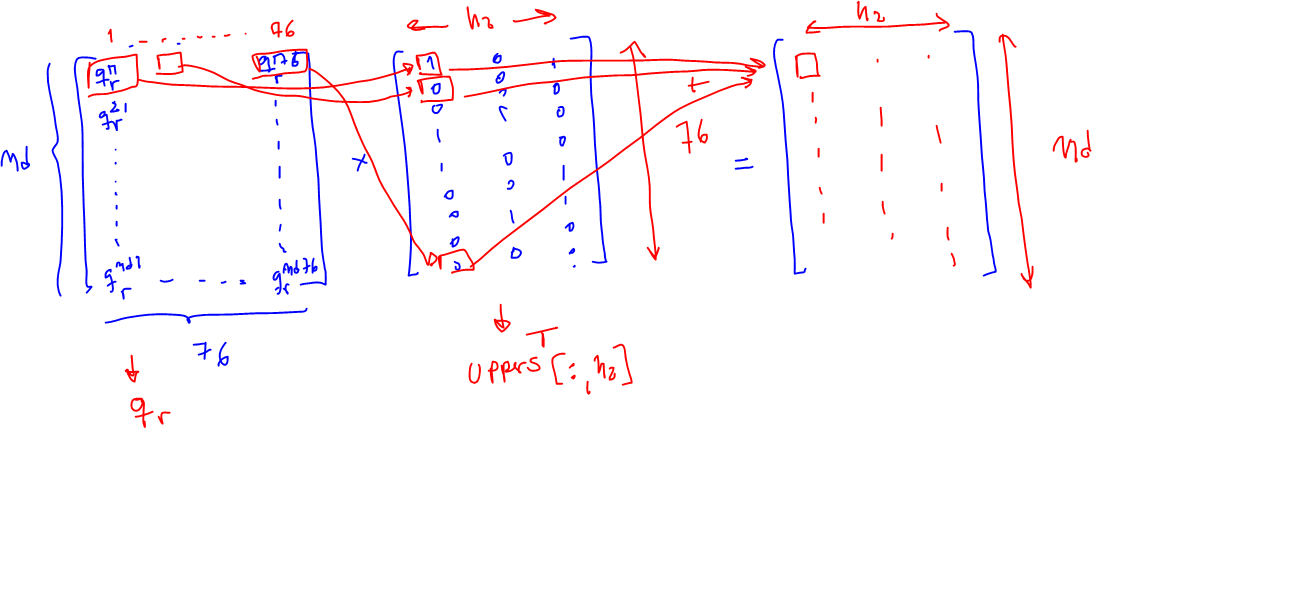
    - Las columnas de esta matriz resultante son el caudal de entrada en cada una de las subcuencas de h2 que llega de aguas arriba, a este resultado hay que sumar el caudal natural en la cuenca y calcular el routing (hago esto de una vez utilizando un producto matricial).

## Cálculo de $\tau$

### Mannin's

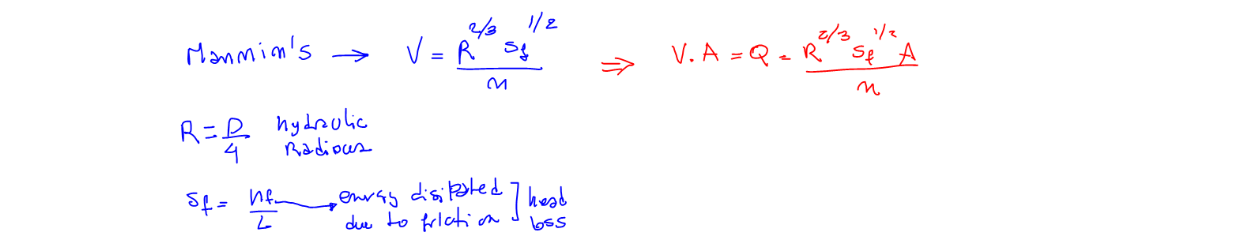

### Onda cinemática

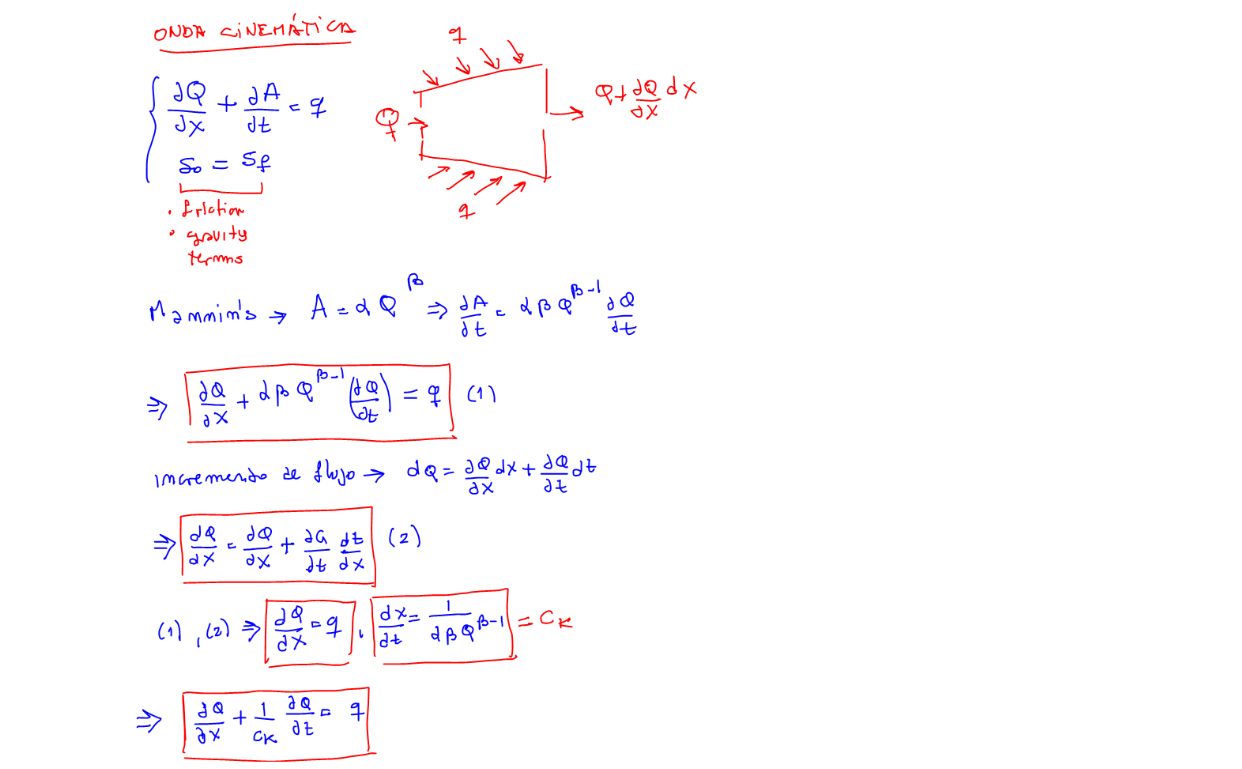

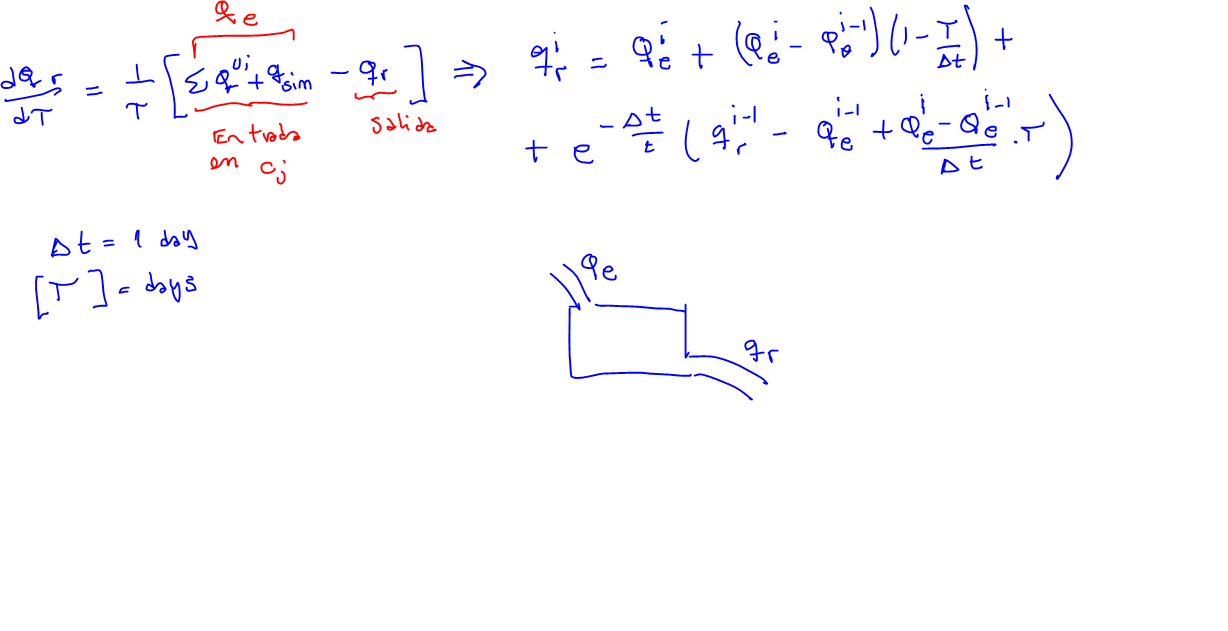

### Valores de n

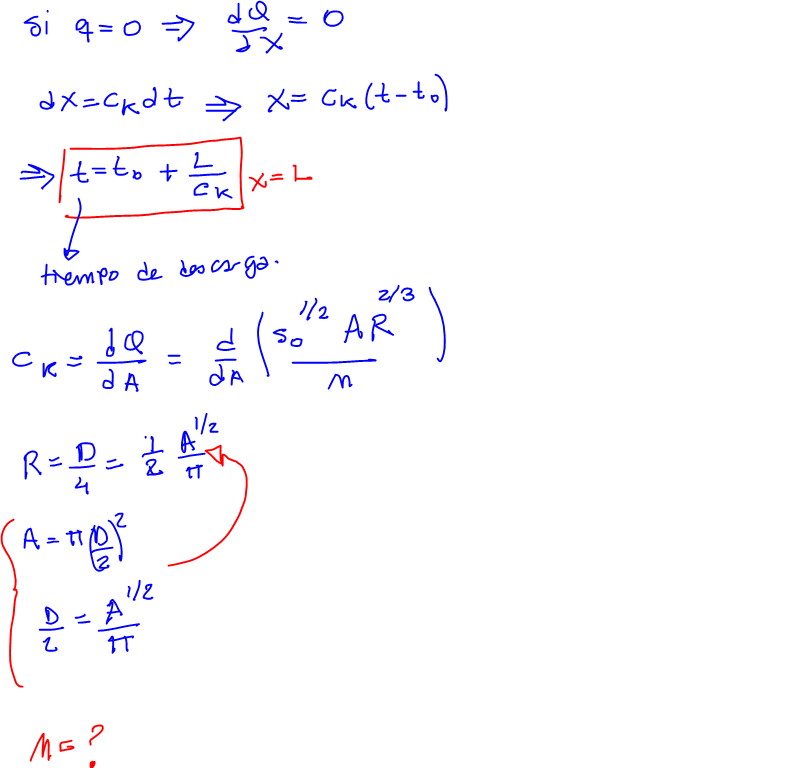

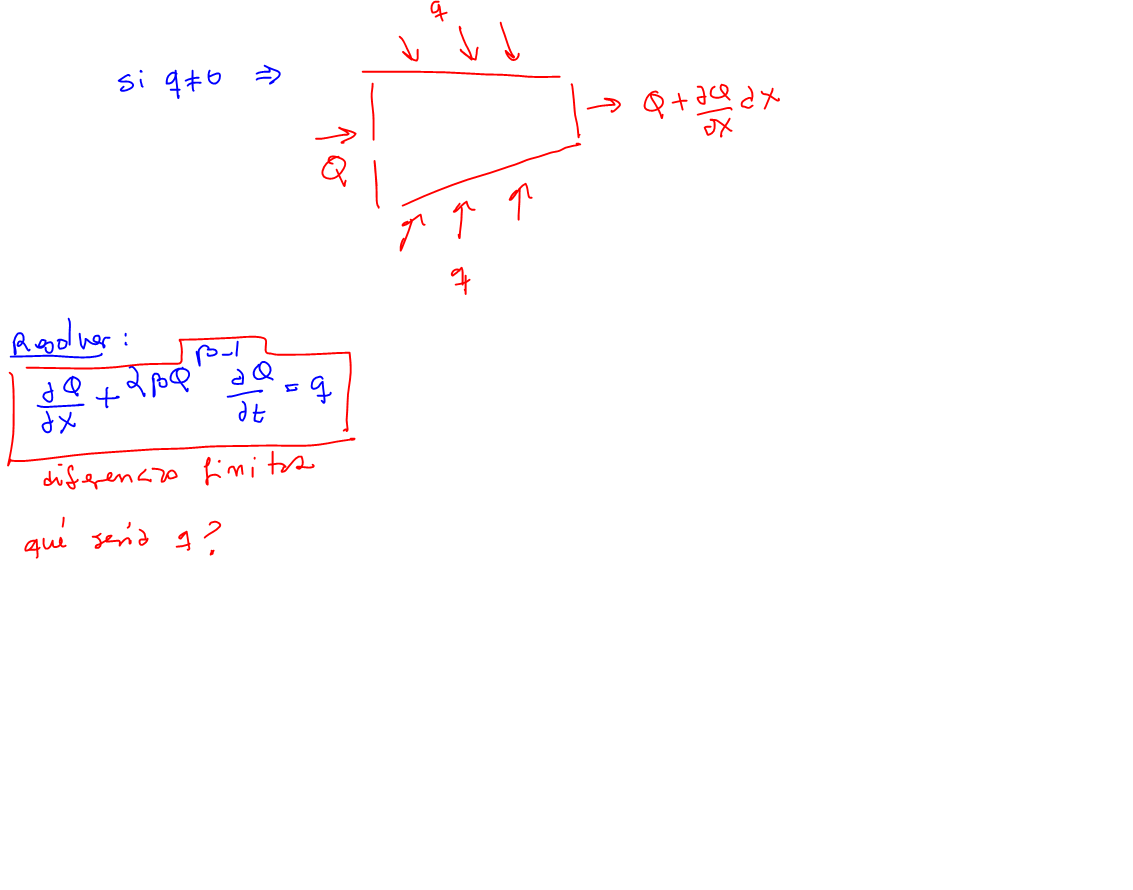

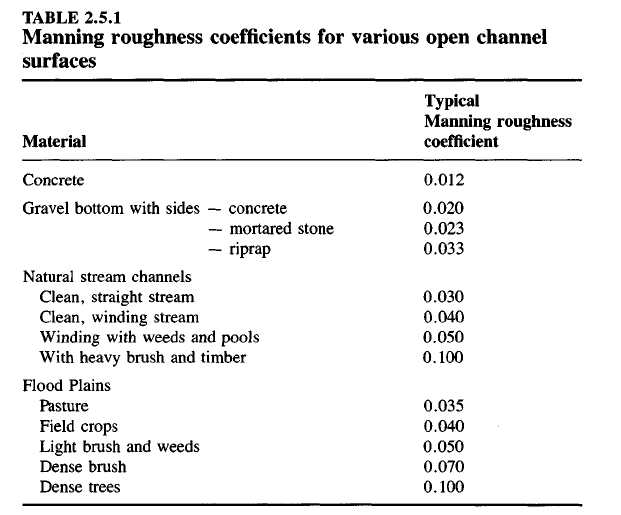

## Plot con routing/sin routing

In [11]:
tramos=pd.read_csv('D:/Chambo/CHAMBO.APIprocess/Custom/old/tramos.csv')

In [12]:
R=tramos.anch/2 #m
S=np.tan((tramos.pend/180)*np.pi)
n=0.03
V=(R**(2/3)*S**(1/2)/n) #m/s
L=tramos.LongCauce_km*10**(3) #m
tau=(L/V)/(60*60) #day

In [15]:
tau_sc=MELCA_RESULTS['tau_tramos'][sub_catchment_id-1]
tau_sc

0.1050816070826989

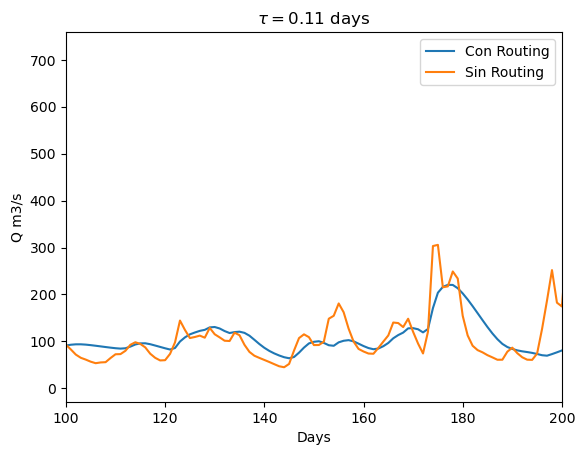

In [16]:
plt.plot(MELCA_Series['qr'])
plt.plot(MELCA_Series['qsim_ac'])
plt.ylabel('Q m3/s')
plt.xlabel('Days')
plt.legend(['Con Routing','Sin Routing'])
plt.title(r'$\tau={}$ days'.format(round(tau_sc,2)))
plt.xlim([100, 200])
plt.savefig("Q_tau_{}.png".format(round(tau_sc,2)))

<Figure size 640x480 with 0 Axes>

## Implementación Qinst/Qsim

### Revisión de la resolución del sistema de ecuaciones

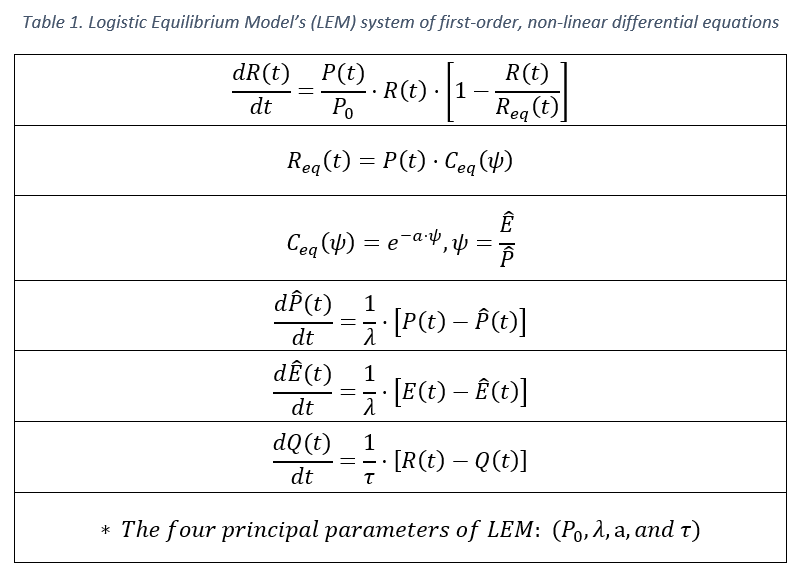

**Runoff:**

Aproximaciones:

- paso de tiempo $\Delta t$
- Se considera $P=cte$, $R_{eq}=cte$ en $\Delta t$

Entonces, en $(t_i, t_i +\Delta t)$, $R$ tiene solución analítica:

\begin{equation}
R(t)= \frac{R_{eq}~R_0~ exp~(P/s_0~ t)}{R_{eq}+R_0\bigg(exp~(P/s_0~ t)-1\bigg)}
\end{equation}

En el código:

\begin{equation}
R^{i}_{inst} = \frac{R^{(i)}_{eq}~R^{(i-1)}_{inst}~ exp~(P^{i}/s_0~ \Delta t)}{R_{eq^{(i)}}+R^{(i-1)}_{inst}\bigg(exp~(P^{i}/s_0~ \Delta t)-1\bigg)}
\end{equation}

donde $R^{i}_{inst}$ es el runoff instantáneo.

**Cálculo de $\hat{P}$ y $\hat{E}:$**

Las ecuaciones para $\hat{P}$ y $\hat{E}$ son ecuaciones lineales (si considero $P=cte$ y $E=cte$ en $\Delta t$). Las soluciones en $(t_i, t_i +\Delta t)$ son:

\begin{equation}
\hat{P}(t)= exp~(-t/\lambda~)\cdot \hat{P}_0+(1-exp~(-t/\lambda)\cdot P
\end{equation}

\begin{equation}
\hat{E}(t)= exp~(-t/\lambda~)\cdot \hat{E}_0+(1-exp~(-t/\lambda)\cdot E
\end{equation}

En el código:

\begin{equation}
\hat{P}^{i}_{inst}= exp~(-\Delta t/\lambda~)\cdot \hat{P}^{i-1}_{inst}+(1-exp~(-\Delta t/\lambda)\cdot P^i \cdot \underbrace{\lambda}_{P*= ~ P/t}
\end{equation}

\begin{equation}
\hat{E}^{i}_{inst}= exp~(-\Delta t/\lambda~)\cdot \hat{E}^{i-1}_{inst}+(1-exp~(-\Delta t/\lambda)\cdot E^i \cdot \underbrace{\lambda}_{E*= E/t}
\end{equation}

**Cálculo de $Q$:**

La ecuación para $Q$ es una ecuación lineal no homoggénea (si considero $P=cte$ y $E=cte$ en $\Delta t$).

He resuelto la ecuación en wolfgram y he obtenido como solución la función [hipergeométrica](https://es.wikipedia.org/wiki/Funci%C3%B3n_hipergeom%C3%A9trica):

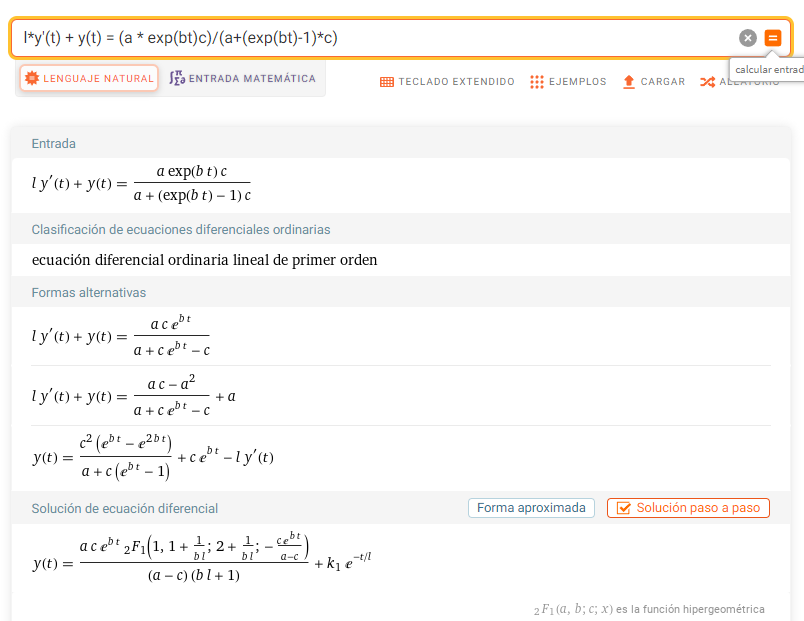


### Fórmulas para obtener los parámetros del modelo

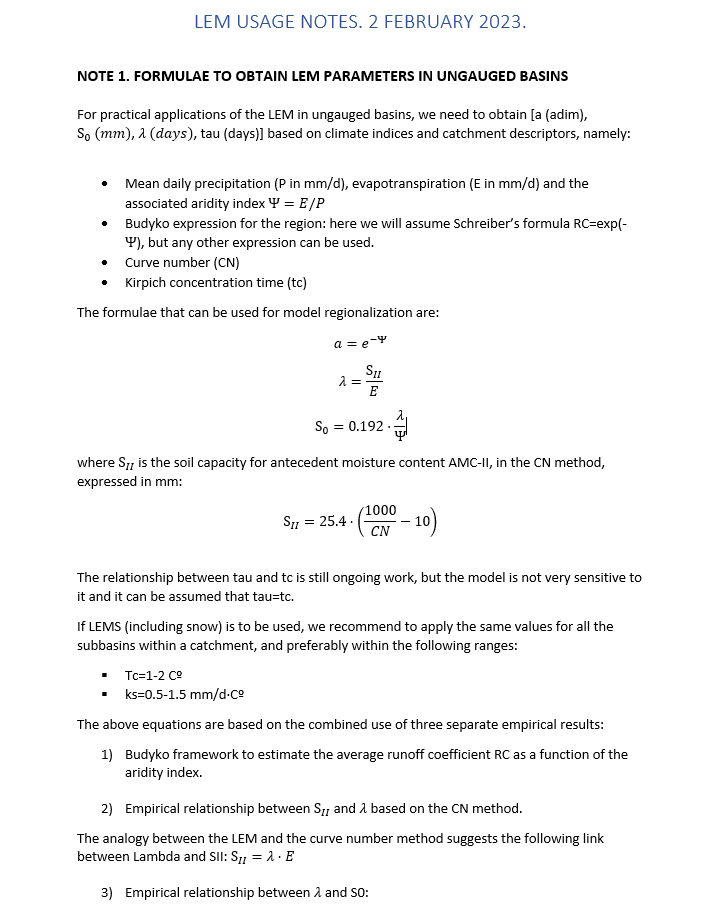

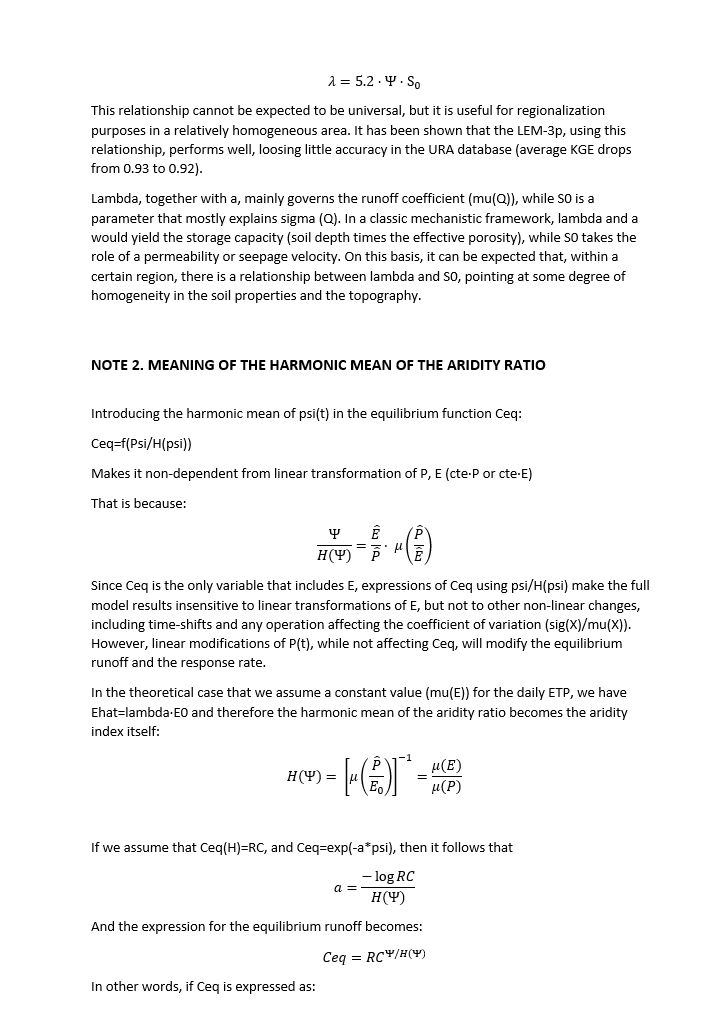

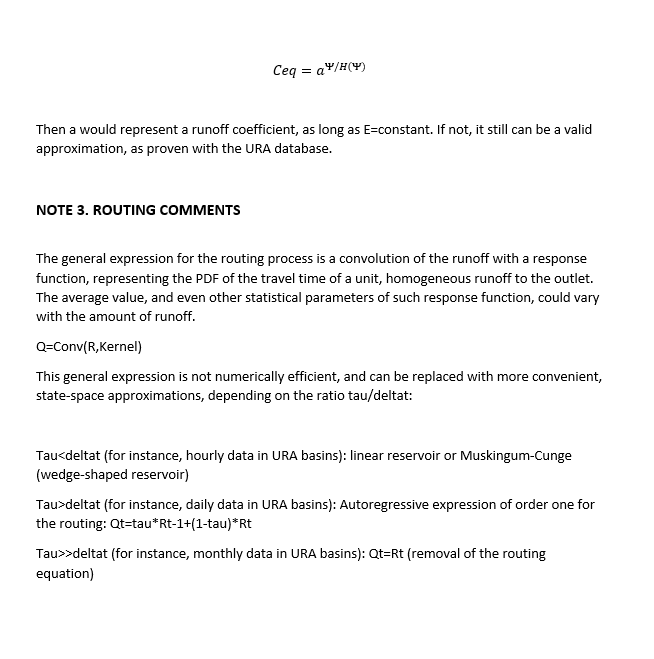

#### Algunas definiciones

***Número de curva CN:*** Es un modelo empírico desarrollado por el Servicio de Conservación de Suelos de Estados Unidos que determina un umbral de escorrentía (P0) a través de un número hidrológico o número de curva (CN) agregado de la cuenca. El Numero de Curva toma un valor de 0 a 100 según sea su capacidad de generar escorrentía superficial. Valores cercanos a 0 representan condiciones de permeabilidad muy alta, mientras que valores cercanos a 100 representan condiciones de impermeabilidad.

***Tiempo de concentración $t_c$:*** se define como el tiempo mínimo necesario para que todos los puntos de una cuenca estén aportando agua de escorrentía de forma simultánea al punto de salida, punto de desagüe o punto de cierre. Está determinado por el tiempo que tarda en llegar a la salida de la cuenca el agua que procede del punto hidrológicamente más alejado, y representa el momento a partir del cual el caudal de escorrentía es constante.

### Aproximaciones para el cálculo de Q

- Consideramos $R_{inst}(t)$ lineal en $\Delta t$:

    $R_{inst}(t)=\underbrace{\frac{R^i_{inst}-R^{i-1}_{inst}}{\Delta t}}_{A} t + \underbrace{R^i_{inst}}_{B}$
    
La ecuación para $Q$ es ahora una ecuación lineal no homogénea con solución analítica:

\begin{equation}C \frac{d Q}{dt}+Q=A t+B\end{equation}
    
    
\begin{equation}\rightarrow Q(t) = -AC+At+B+c_1 exp(-t/C)\end{equation} $c_1$  a definir con las condicines iniciales.


\begin{equation}\rightarrow Q(t) = \underbrace{\frac{R^{i}_{inst}-R^{i-1}_{inst}}{\Delta t}}_{A}(t-\underbrace{\tau}_{B})+\underbrace{R^{i-1}_{inst}}_{C}+exp(-t/\tau)\bigg[\underbrace{Q^{i-1}_{ints}}_{D}-\underbrace{R^{i-1}_{inst}}_{C}+\frac{R^{i}_{inst}-R^{i-1}_{inst}}{\Delta t}\tau\bigg]\end{equation}

\begin{equation}\rightarrow Q(t) = A(t-\tau)+C+exp(-t/B)\bigg[D-C+AB\bigg]\end{equation}



En el código:

\begin{equation}
Q^i_{inst}=R^{i-1}_{inst}+\frac{R^i_{inst}-R^{i-1}_{inst}}{\Delta t}(\Delta t-\tau)+exp(-\Delta t/\tau)~\bigg(~Q^{i-1}_{inst}-R^{i-1}_{inst}+\frac{R^i_{inst}-R^{i-1}_{inst}}{\Delta t}~\tau \bigg)
\end{equation}

Con $\Delta t= 1$:


\begin{equation}
Q^i_{inst}=R^{i-1}_{inst}+(R^i_{inst}-R^{i-1}_{inst})(1-\tau)+exp(-1/\tau)~\bigg(~Q^{i-1}_{inst}-R^{i-1}_{inst}+(R^i_{inst}-R^{i-1}_{inst})~\tau\bigg)
\end{equation}


### Cálculos considerando los valores medios 

Los valores medios dan una mejor representación de lo que sucede en cada intervalo temporal, sobre todo cuando el intervalo es del orden de un día o mayor.

Aproximaciones:

- Paso de tiempo  Δ𝑡 
- Se considera  $P=𝑐𝑡𝑒$ , $E=cte$,  $𝑅_{𝑒𝑞}=𝑐𝑡𝑒$  en  $Δ𝑡$

Procedimiento:

- Se resuelven las ecs. en el intervalo $(t_i, t_i+\Delta t)$ que, con las aproximaciones hechas, tienen solución analítica.
- Se calcula el valor medio resolviendo las intergrales correspondientes.

**Cálculo de los valores medios de $\hat{P}$ y $\hat{E}:$**

\begin{equation}
<\hat{P}>=\frac{1}{\Delta t}\int^{\Delta t}_0 \hat{P}(t) dt = P-\lambda ~(~1-exp~(-\Delta t/\lambda)~)\frac{P-P_0}{\Delta t}
\end{equation}

\begin{equation}
<\hat{E}>=\frac{1}{\Delta t}\int^{\Delta t}_0 \hat{E}(t) dt = E-\lambda ~(~1-exp~(-\Delta t/\lambda)~)\frac{E-E_0}{\Delta t}
\end{equation}

**Cálculo del valor medio de $R$:**

\begin{equation}
<R>=\frac{1}{\Delta t}\int^{\Delta t}_0 R(t) dt = \frac{1}{\Delta t} ~\frac{s_0~R_{eq}}{P}~log\bigg[1+\frac{R_0}{R_{eq}(exp(P~\Delta t /S_0)-1)}\bigg]
\end{equation}

**En el código:**

Para cada paso temporal:

1 - Calculo los valores instantáneos de $\hat{P}$ y $\hat{E}$

\begin{equation}
\hat{P}^{i}_{inst}= exp~(-\Delta t/\lambda~)\cdot \hat{P}^{i-1}_{sim}+(1-exp~(-\Delta t/\lambda)\cdot P^i 
\end{equation}

\begin{equation}
\hat{E}^{i}_{inst}= exp~(-\Delta t/\lambda~)\cdot \hat{E}^{i-1}_{sim}+(1-exp~(-\Delta t/\lambda)\cdot E^i 
\end{equation}

2 - Calculo los valores medios

\begin{equation}
\hat{P}^{i}_{sim}= P^i-\lambda ~(~1-exp~(-\Delta t/\lambda)~)\frac{P^i-\hat{P}^{i-1}_{inst}}{\Delta t}
\end{equation}

\begin{equation}
\hat{E}^{i}_{sim}= E^i-\lambda ~(~1-exp~(-\Delta t/\lambda)~)\frac{E^i-\hat{E}^{i-1}_{inst}}{\Delta t}
\end{equation}

3- Calculo $R_{eq}$ utilizando los valores medios:

\begin{equation}
R^{i}_{eq}=P^i~exp~(-a\hat{E}^{i}_{sim}/\hat{P}^{i}_{sim})~
\end{equation}

4- Calculo el Runoff:

\begin{equation}
R^{i}_{inst} = \frac{R^{(i)}_{eq}~R^{(i-1)}_{inst}~ exp~(P^{i}/s_0~ \Delta t)}{R_{eq^{(i)}}+R^{(i-1)}_{sim}(exp~(P^{i}/s_0~ \Delta t)-1)}
\end{equation}

5- Calculo el valor medio del runoff:

\begin{equation}
R^{i}_{sim}= \frac{1}{\Delta t} ~\frac{s_0~R^{i}_{eq}}{P^i}~log\bigg[1+\frac{R^{i}_{inst}}{R^i_{eq}(exp(P^i~\Delta t /S_0)-1)}\bigg]
\end{equation}

6- Calculo el valor instantáneo de Q 

\begin{equation}
Q^{i}_{inst}= F(R^{i}_{inst},R^{i-1}_{sim},Q^{i-1}_{inst})
\end{equation}


7- Calculo el Valor medio de Q resolviendo la integral:

\begin{equation}
<Q>=\frac{1}{\Delta t}\int^{\Delta t}_0 Q(t) dt 
\end{equation}

Con la versión aproximada:

\begin{equation}
<Q(t)>=A\bigg[-B^2exp(-t/B)-Bt+t^2/2 \bigg]+Bexp(-t/B)(C-D)+Ct
\end{equation}

\begin{equation}
Q^i_{sim}=(1/\Delta t)\frac{R^i_{inst}-R^{i-1}_{inst}}{\Delta t}\bigg[-\tau^2\big(1-exp(-\Delta t/\tau)\big)-\tau \Delta t+\Delta t^2/2 \bigg]+(\tau /\Delta t) (R^{i-1}_{inst}-Q^{i-1}_{inst})\bigg(exp(-\Delta t/\tau) -1\bigg)+R^{i-1}_{inst}
\end{equation}

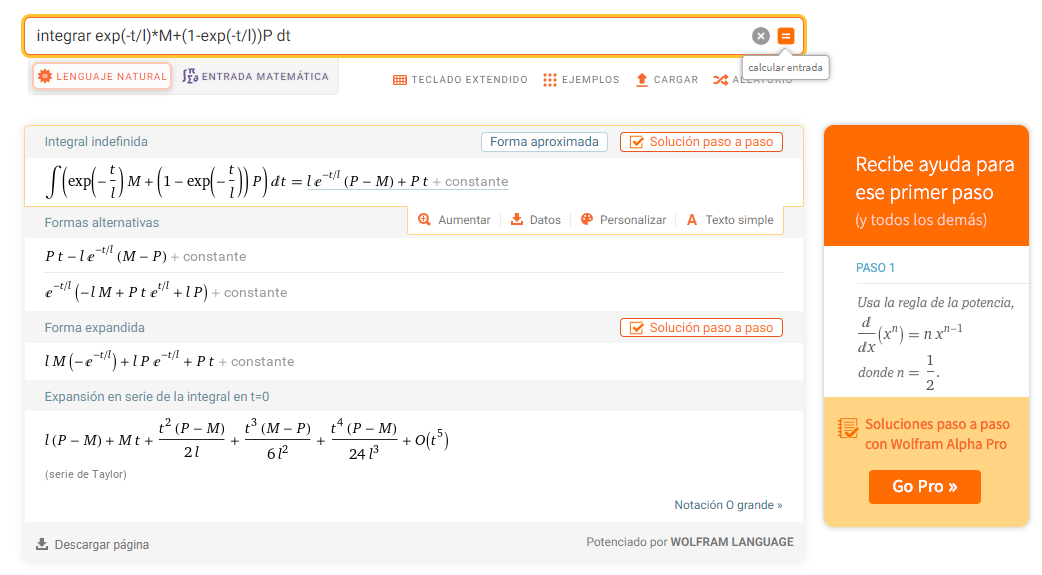

### Plots de qmed/ qinst

(150.0, 200.0)

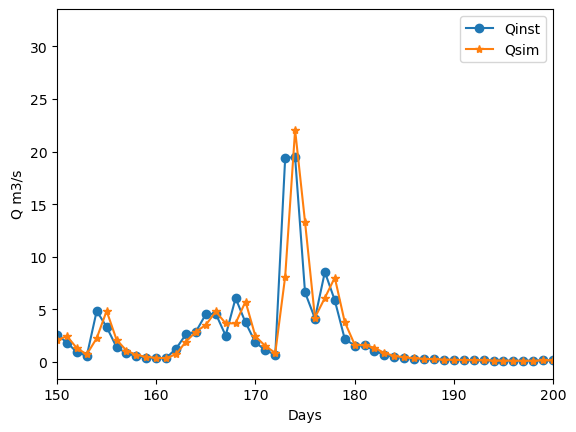

In [21]:
plt.plot(MELCA_Series['qinst'],marker='o')
plt.plot(MELCA_Series['qsim'],marker='*')
plt.ylabel('Q m3/s')
plt.xlabel('Days')
plt.legend(['Qinst','Qsim'])
plt.xlim([150, 200])

### Notas a mano

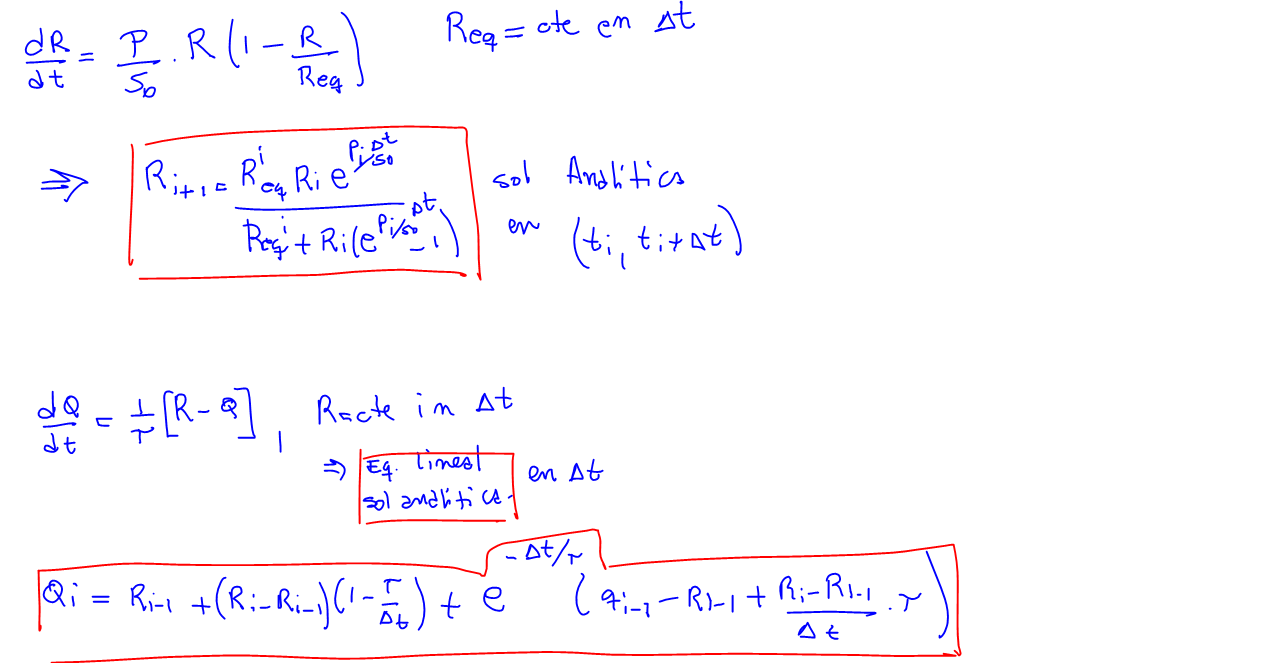

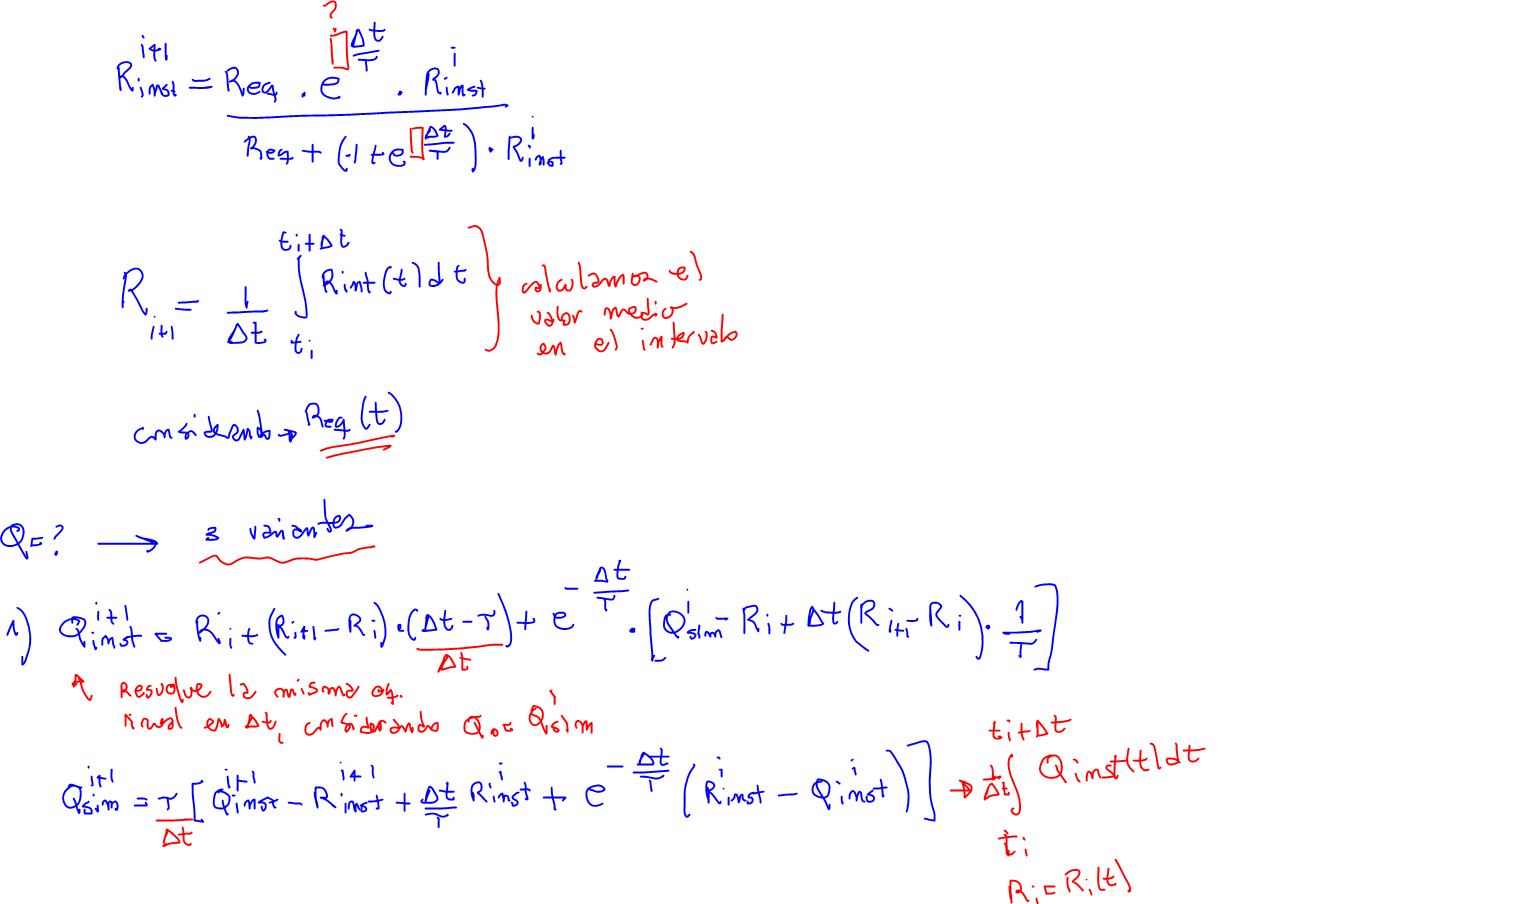

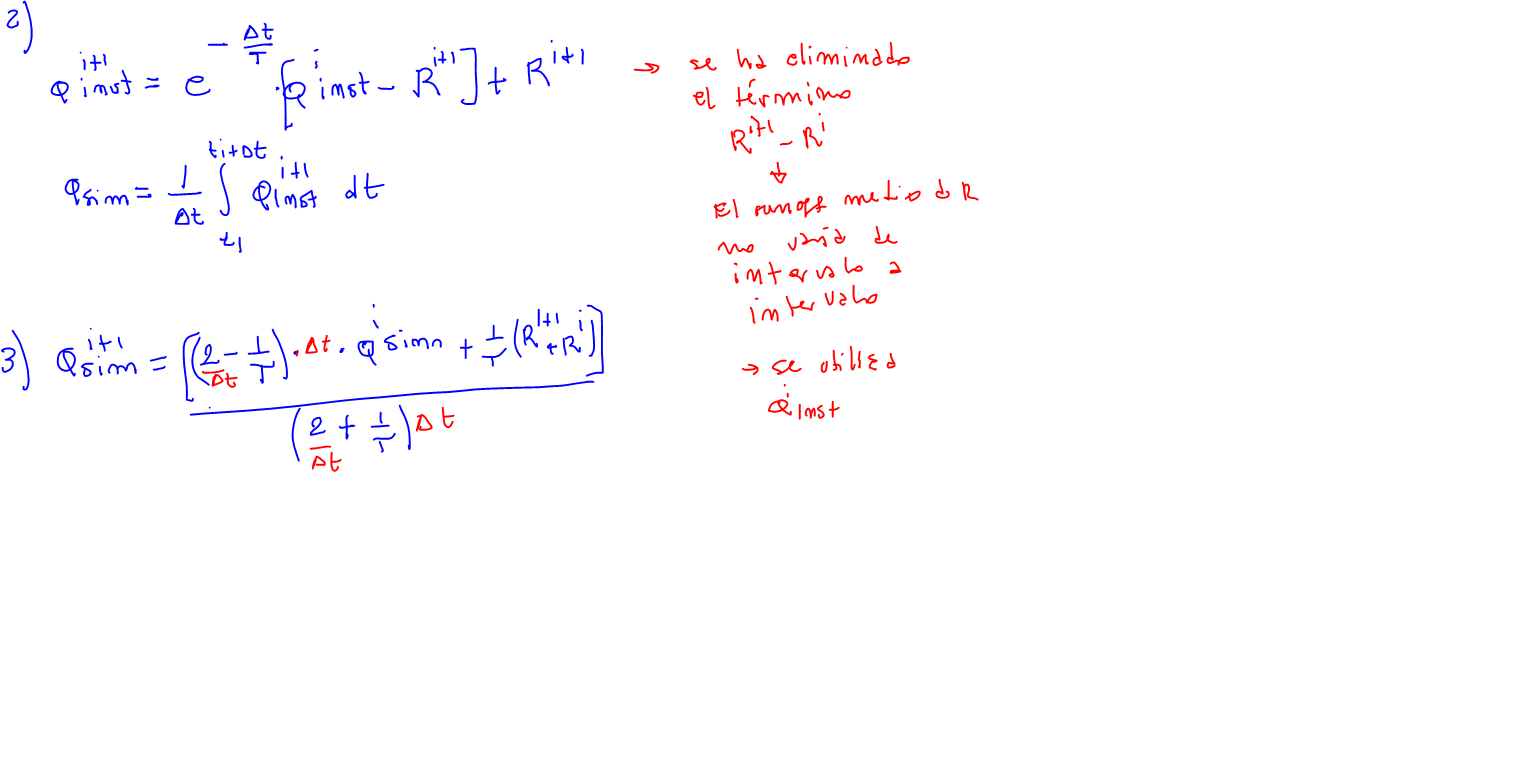

Cáculo del valor medio de R

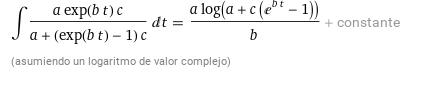

In [17]:
#tau[0:50]

# Resultados de MANAGEDMENT

In [126]:
#obtención de la tabla con los indicadores de calidad
if custom:
    MANADGEMENT_RESULTS=Custom_MANAGEMENT(sub_catchment_id,initial_date,final_date,False)
else:
    MANADGEMENT_RESULTS=MANAGEMENT(sub_catchment_id,initial_date,final_date,False)
print('Finished')

Runing MANAGEMENT ...
Writing tables ...
Finished


In [127]:
MANADGEMENT_RESULTS1=MANADGEMENT_RESULTS[0]
MANADGEMENT_RESULTS1

,id,lon,IAC1,IAC2
0,1,4.7172,89.915358,50.880254
1,2,5.1021,40.594568,97.751483
2,3,5.2013,100.000000,98.093496
3,4,0.6311,100.000000,99.892766
4,5,1.2745,100.000000,100.000000
...,...,...,...,...
71,72,1.2133,25.634439,66.070197
72,73,1.9513,42.903119,97.115704
73,74,17.5056,0.614046,61.022101
74,75,16.3733,100.000000,91.447719


In [128]:
MANADGEMENT_RESULTS2=MANADGEMENT_RESULTS[1]
MANADGEMENT_RESULTS2

,Gar,VaL_unit_med,Val_agr
0,0.976926,0.295385,5.460194e+05
1,0.424723,0.184945,1.040406e+06
2,0.328011,0.165602,7.879852e+05
3,0.218079,0.143616,4.444619e+06
4,0.422451,0.184490,1.056878e+06
...,...,...,...
94,2.152996,0.530599,4.323122e+06
95,0.520081,0.204016,1.171142e+06
96,0.652013,0.230403,8.053771e+05
97,1.219602,0.343920,1.322766e+06


In [129]:
qmodm=np.array(MANADGEMENT_RESULTS[2])

In [130]:
#Obtención de las series temporales con los caudales
if custom:
    MANADGEMENT_SERIES=Custom_MANAGEMENT(sub_catchment_id,initial_date,final_date,True)
else:
    MANADGEMENT_SERIES=MANAGEMENT(sub_catchment_id,initial_date,final_date,True)
print('Finished')

Runing MANAGEMENT ...
Writing tables ...
Finished


In [131]:
MANADGEMENT_SERIES

,qdsim,qin,qnat,qnatac,qout
0,0.090000,35.272161,0.365648,57.361889,35.301167
1,0.090000,35.272161,0.365648,57.037029,35.301167
2,0.090000,36.885580,0.293673,60.751095,36.914586
3,0.277658,44.698309,0.248132,74.144093,44.727315
4,0.250230,41.538278,0.223149,70.718936,41.567284
...,...,...,...,...,...
7300,0.030854,7.520057,0.027693,14.695924,7.534494
7301,0.040798,9.211363,0.029404,16.670796,9.225497
7302,0.053025,9.927439,0.028416,20.175118,9.941429
7303,0.055844,10.561706,0.026676,22.099860,10.575515


### Descripción módulo de gestión:

- calcula vec (lista con las ids de las cuencas ordenadas por jerarquía, el número de upper-sub-catchments).
- Recorre cada una de las demandas y obtiene
    - c0= sub-cuenca de inicio (demanda toma de aquí)
    - c1=sub-cuenca de fin (demanda vierte aquí)
- Busca posición en vecc de c0 y c1 (njinin, njfin)
- si njinin>= njfin y c0 != C1:
    - si matcon [c0,c1] ==0 (es decir c1 y c0 no estan conectadas) --> cambio el orden de c1 y c0 en vecc.

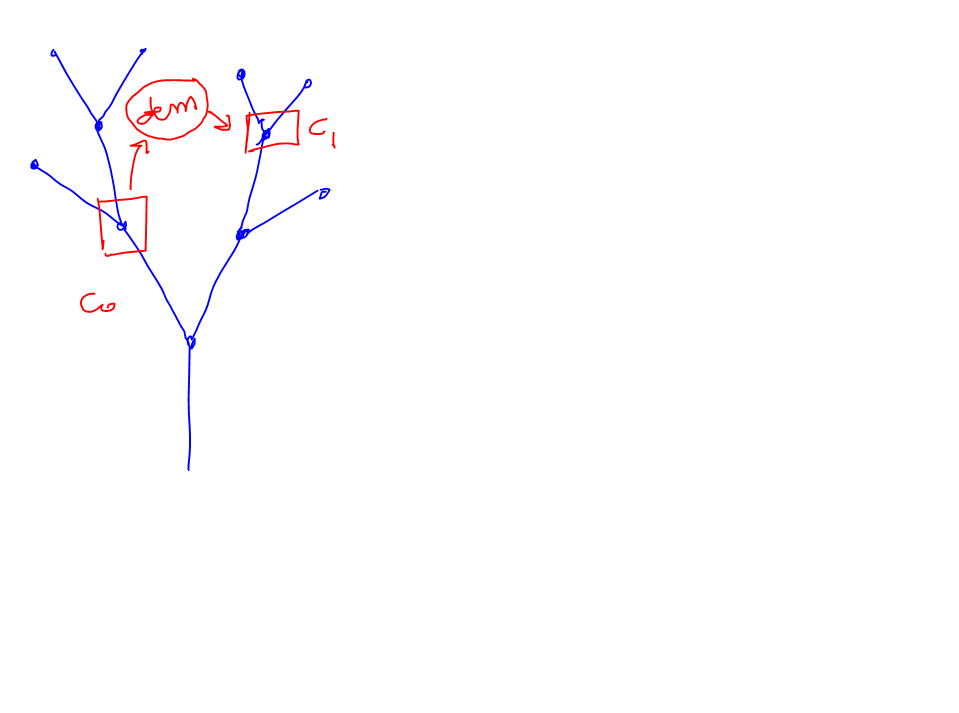

Loop principal:

- iteramos a travez de todas las cuencas en vecc.
- buscamos para cada cuenca las upper-subcatchments.
- calculamos $Q_{ups}$, el flujo proveniente de las upper.
- calculamos el flujo disponible: $Q_{in}=Q_{ver}+Q_{ups}+Q_{nat}$.

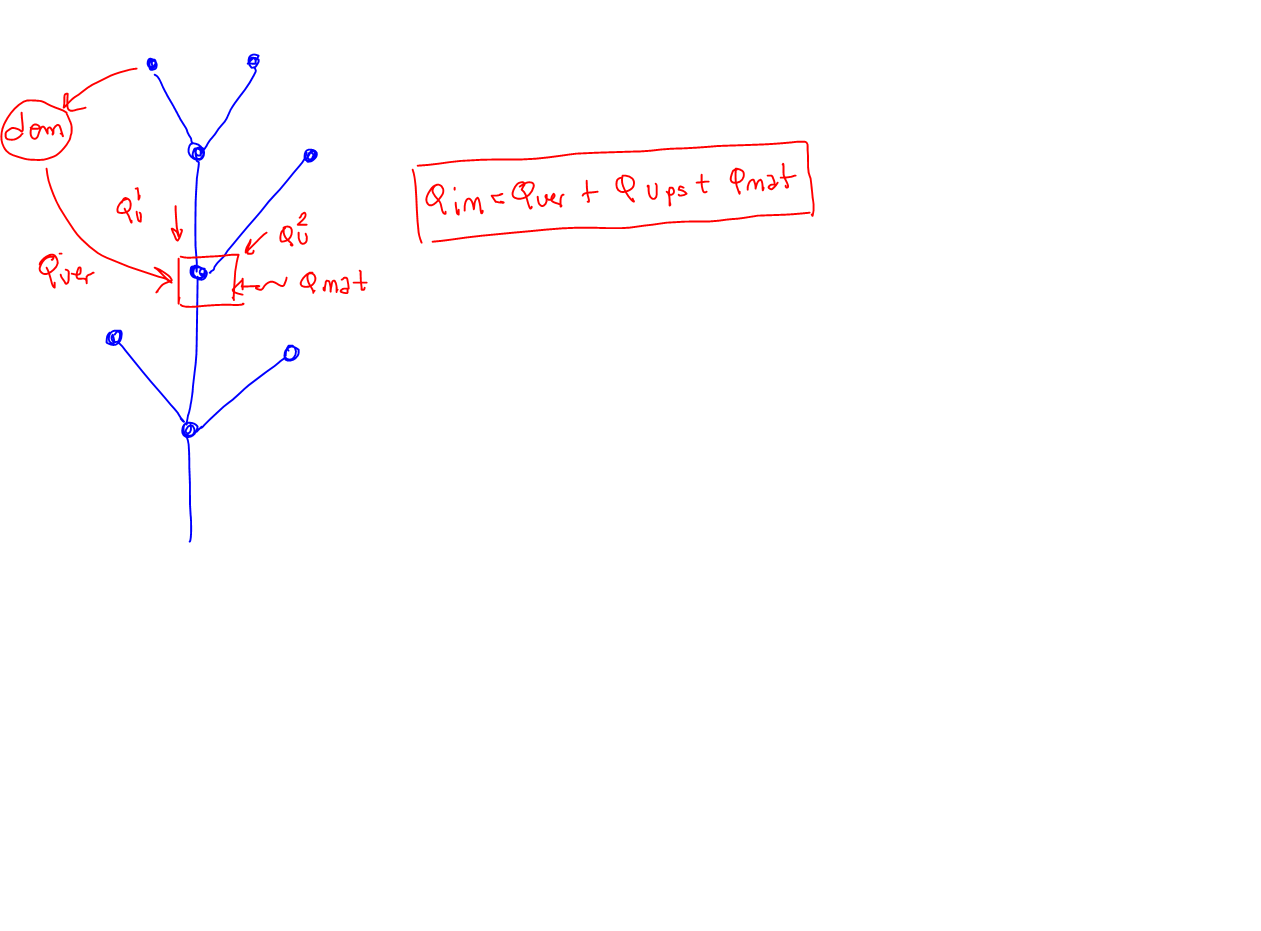

Satisfacemos las demandas, si la cuenca no es un embalse:

- Aplicamos ec. de continuidad: $Q_{out}=Q_{in}$
- Recorremos las demandas por orden de prioridades (en la subcuenca dada).
- Repartimos el agua:
    - Ordenamos las demandas de menor a mayor  
    - Checkeamos cuantas demandas pueden ser satisfechas a la vez si repartimos el aqua equitativamente qdisp/ndem.
    - Satisfacemos el manyor nº de demandas posible al 100%.
    - Distribuímos el agua que sobra al resto.
    - Calculamos la suma de las demandas satisfechas.
    - Restamos esta suma a $Q_{out}$ (nuevo caudal disponible).
- Calculamos los vertidos y lo sumamos a $Q_{out}$.
- Aquí sería el momento de aplicar el routing sobre $Q_{out}$?    

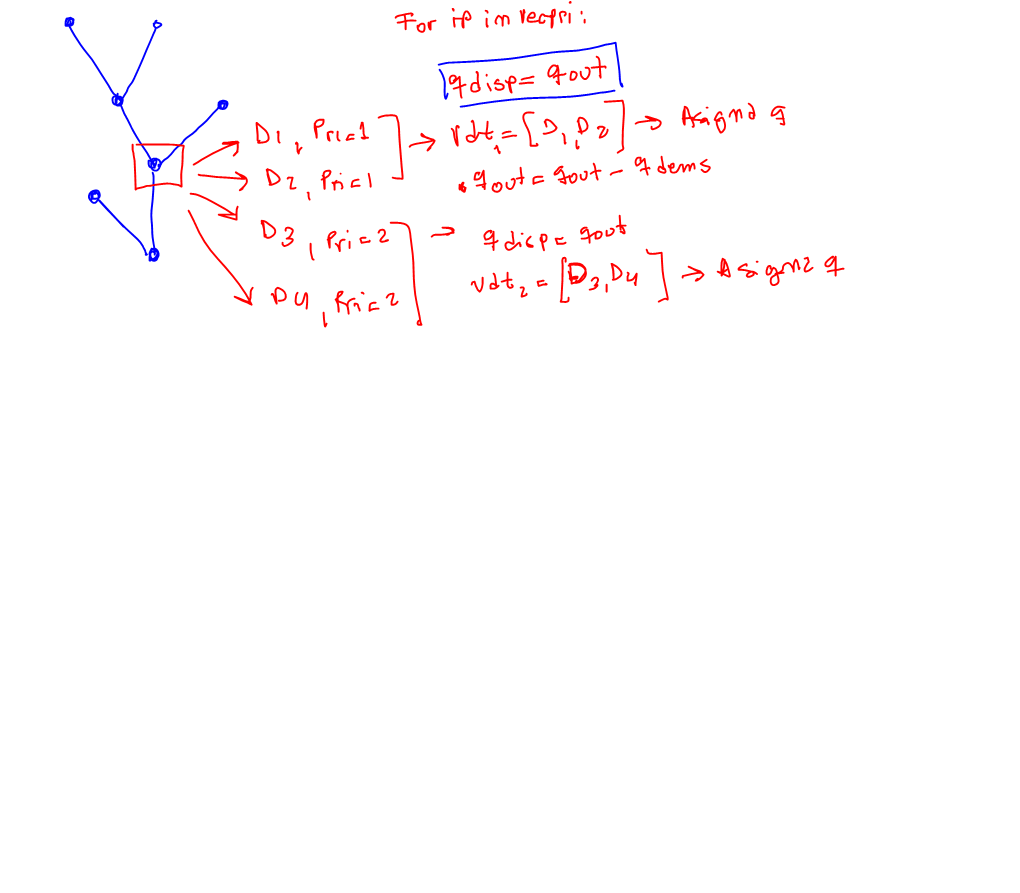

# Resultados Quality

In [132]:
#obtención de la tabla con las concentraciones, Smed, etc 
if custom:
    QUALITY_RESULTS=Custom_Quality(sub_catchment_id,initial_date,final_date,False)
else:
    QUALITY_RESULTS=Quality(sub_catchment_id,initial_date,final_date,False)
    
print('Finished')

Runing Quality ...
Writing tables ...
Finished


In [133]:
QUALITY_RESULTS

,Smed,conc_p50,conc_p90,dSmed,id,lon
0,181.843823,29.730000,35.263743,5.762283,1,4.7172
1,682.802216,0.319373,0.945661,21.636697,2,5.1021
2,5.678285,0.359577,0.367539,0.179934,3,5.2013
3,2.683384,0.008453,0.019005,0.085031,4,0.6311
4,0.000000,-0.000000,-0.000000,0.000000,5,1.2745
...,...,...,...,...,...,...
71,223.054987,16.479754,32.396988,7.068186,72,1.2133
72,919.525897,0.474593,1.121402,29.138017,73,1.9513
73,381.964138,17.483250,44.534612,12.103713,74,17.5056
74,342.360243,2.450798,2.556866,10.848741,75,16.3733


In [134]:
#Obtención de las series temporales del módulo de calidad
if custom:
    QUALITY_Series=Custom_Quality(sub_catchment_id,initial_date,final_date,True)
else:
    QUALITY_Series=Quality(sub_catchment_id,initial_date,final_date,True)
print('Finished')

Runing Quality ...
Writing tables ...
Finished


In [135]:
QUALITY_Series

,cout,qdt,qvt
0,0.691399,0.0,0.029006
1,0.691324,0.0,0.029006
2,0.556893,0.0,0.029006
3,0.405497,0.0,0.029006
4,0.403983,0.0,0.029006
...,...,...,...
7300,0.490910,0.0,0.014438
7301,0.405078,0.0,0.014134
7302,0.368045,0.0,0.013990
7303,0.334063,0.0,0.013809


`qdt:` total flow by sections
`qvt:` total discharge flow by sections

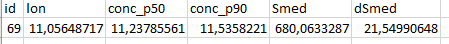

# Gráficos

In [109]:
#Perfiles longitudinales
per1=np.array([69,62,68,64,65,44,49,50,47,45,34,19,26,10,8,2,7,73])-1 #Ozogoche
lon=MANADGEMENT_RESULTS1['lon'][per1]
lac1=np.cumsum(lon) 

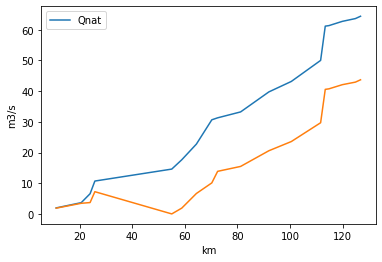

In [136]:
plt.plot(lac1,MELCA_RESULTS['qmed_ac'][per1])
plt.plot(lac1,qmodm[per1])
plt.ylabel('m3/s')
plt.xlabel('km')
plt.legend(['Qnat'])

In [137]:
QUALITY_Series.head()

,cout,qdt,qvt
0,0.691399,0.0,0.029006
1,0.691324,0.0,0.029006
2,0.556893,0.0,0.029006
3,0.405497,0.0,0.029006
4,0.403983,0.0,0.029006


Text(0.5, 1.0, 'sub catchment 73')

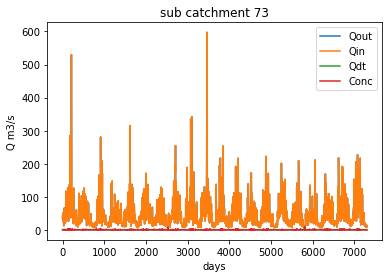

In [138]:
plt.plot(MANADGEMENT_SERIES['qout'])
plt.plot(MANADGEMENT_SERIES['qin'])
plt.plot(QUALITY_Series['qdt'])
plt.plot(QUALITY_Series['cout'])
plt.ylabel('Q m3/s')
plt.xlabel('days')
plt.legend(['Qout','Qin','Qdt','Conc'])
plt.title('sub catchment 73')

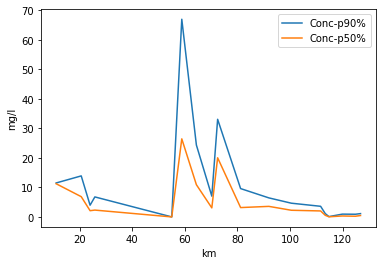

In [139]:
plt.plot(lac1,QUALITY_RESULTS['conc_p90'][per1])
plt.plot(lac1,QUALITY_RESULTS['conc_p50'][per1])

plt.ylabel('mg/l')
plt.xlabel('km')
plt.legend(['Conc-p90%','Conc-p50%'])

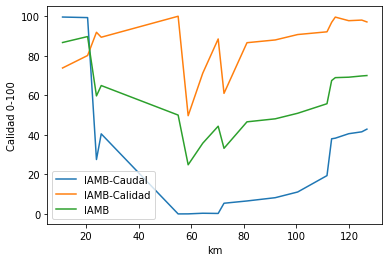

In [140]:
amb1=MANADGEMENT_RESULTS1['IAC1'][per1]
amb2=MANADGEMENT_RESULTS1['IAC2'][per1]

plt.plot(lac1,amb1)
plt.plot(lac1,amb2)
plt.plot(lac1,(amb1+amb2)/2)

plt.ylabel('Calidad 0-100')
plt.xlabel('km')
plt.legend(['IAMB-Caudal','IAMB-Calidad','IAMB'])

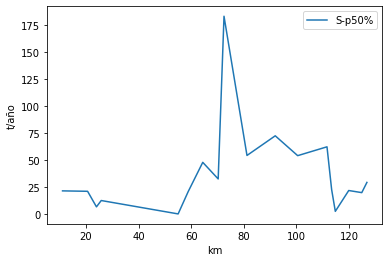

In [142]:
plt.plot(lac1,QUALITY_RESULTS['dSmed'][per1])
plt.ylabel('t/año')
plt.xlabel('km')
plt.legend(['S-p50%'])

# Estabilidad de las ecuaciones

- La solucion del routing como deposito lineal no es estable para cualquier $\Delta t$, cuando  $\Delta t$ es mayor al tiempo de respuesta de la cuenca, $\Delta t> \tau$, la solución se vuelve inestable, esto sucede cuando tomamos un $\Delta t$ diario. 

- como resolverlo:
    -  hacer sub-steping, es decir, convertir todo a escala horaria, y asumir que la lluvia es constante en cada día y dividir $\Delta t$ por 24 y considerar un depósito lineal.
    - Considerar un modelo de autorregresión:            
            Q(t)=R(t-tau)
            Q=tau*R(t-1)+(1-tau)*R(t) ---> desfasar una señal un tiempo menor a dt. funciona mientras que dt > al tiempo de respuesta de la cuenca.
    -Expresar la solucion de la eq lineal con un kernel, resolver la misma eq para Q pero utilizando una función de green.

## Resolución de la ecuación diferencial para Q, utilizando funciones d Green:

\begin{equation}
\tau \frac{dQ}{dt}+Q=R \rightarrow Q=\int_0^t G(t,s) R(s) ds
\end{equation}

donde 

\begin{equation}
\tau \frac{dG}{dt}+G=\delta(t-s)
\end{equation}


La solución es:

\begin{equation}
G(t,s)=\frac{e^{-(t-s)/\tau}}{\tau}
\end{equation}

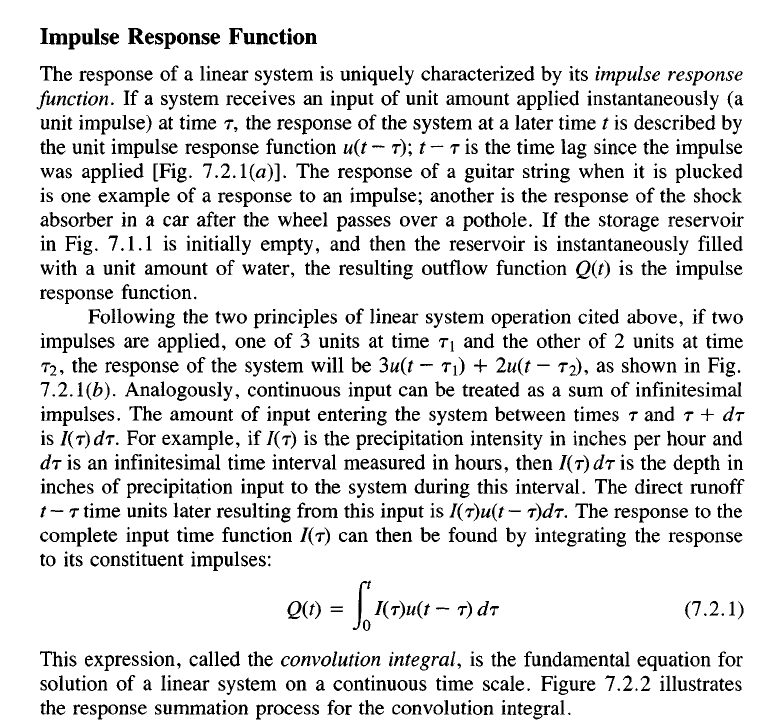

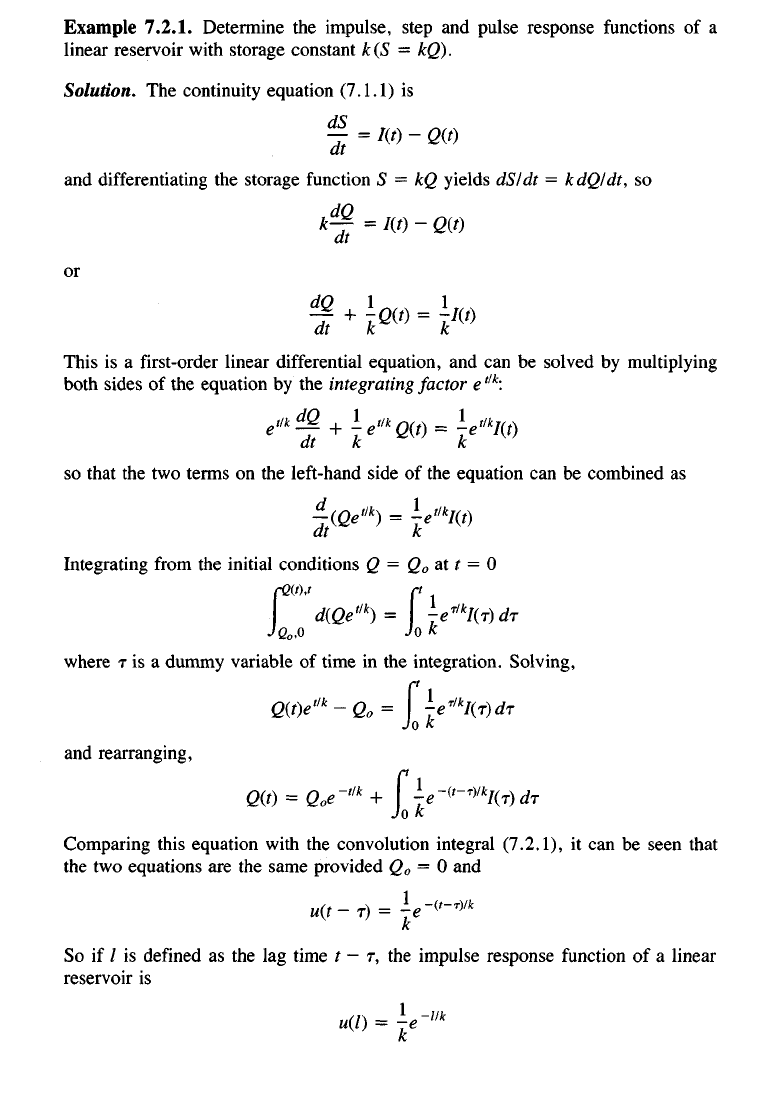

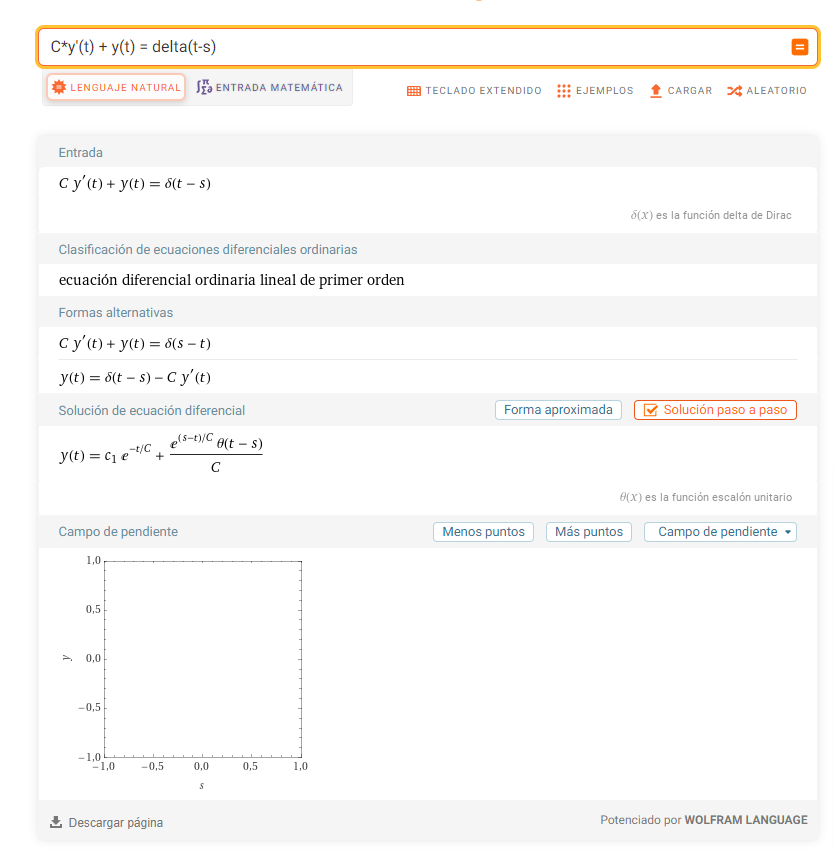

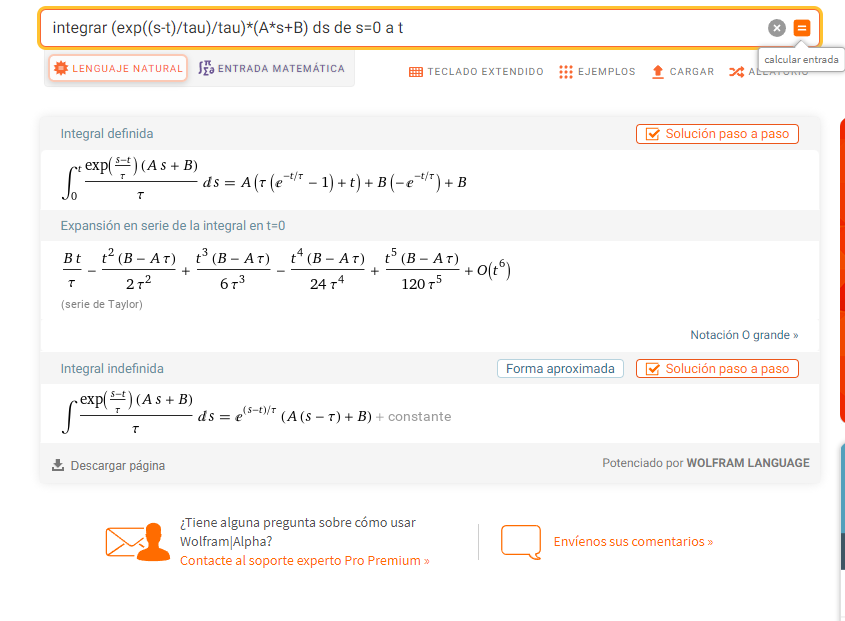

# Tareas

- Módulo nieve --> prioritario
- Definir los esquemas numericos y analizar su estabilidad 

    --> prioritario definir una version canonica (caudales medios + dos o tres metodos de routing y con nieve), va a trabajar a escala diaria.
    
- Algoritmos de optimizacion para utilizar el modelo a partir de datos
- Revisar el modulo de gestion --> prioritarioa (incluir descriptor de si son afluentes o intercuencas?)
- Validación
- Agregar embalses --> trabajo de meses
- Modelo distribuído
- Volver a revisar el doc que le envió a Luis